# Setup

## Imports

In [1]:
# Import Libraries
library(plyr)
library(tidyverse)
library(lme4)
library(car)
library(ggplot2)
library(lmerTest)
library(broom)
library(data.table)
library(pander)
library(emmeans)
library(ggsignif)

# Load helper functions
source("r_scripts/helper_functions.R")

## set universal plot size:
options(repr.plot.width=7, repr.plot.height=3.5)

# avoids scientific notation
options(scipen=999) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: carData

Attaching package: ‘car’

The following object i

In [2]:
source('https://raw.githubusercontent.com/hauselin/Rcode/master/summaryh.R')


  This is piecewiseSEM version 2.0.2

  If you have used the package before, it is strongly recommended you read Section 3 of the vignette('piecewiseSEM') to familiarize yourself with the new syntax

  Questions or bugs can be addressed to <jlefcheck@bigelow.org>

Attaching package: ‘sjstats’

The following object is masked from ‘package:broom’:

    bootstrap



d: 0.20 (small), 0.50 (medium), .80 (large) (Cohen, 1992)
r: .10 (small), .30 (medium), .50 (large) (Cohen, 1992)
R2: .02 (small), .13 (medium), .26 (large) (Cohen, 1992)


# DDM

## Base Version

In [4]:
# load data
df_ddm = read_csv("data/DDM_ParameterEstimates_Bayes.csv")
df_ddm_constant = read_csv("ddm/DDMAnalysis_ConstantModel/params_GoodSubjects.csv")

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  Subject = col_double(),
  wTaste_nat = col_double(),
  wHealth_nat = col_double(),
  Threshold_nat = col_double(),
  Bias_nat = col_double(),
  ndt_nat = col_double(),
  wConstant_nat = col_double(),
  wTaste_health = col_double(),
  wHealth_health = col_double(),
  Threshold_health = col_double(),
  Bias_health = col_double(),
  ndt_health = col_double(),
  wConstant_health = col_double(),
  wTaste_desire = col_double(),
  wHealth_desire = col_double(),
  Threshold_desire = col_double(),
  Bias_desire = col_double(),
  ndt_desire = col_double(),
  wConstant_desire = col_double()
)


In [5]:
dim(df_ddm_constant)[1]

[1] 50

In [6]:
# Remove rejected subjects 

good_subjects = c(101:104, 106:112, 114, 116, 118:121, 123:126, 129:137, 139:140, 142:148, 150, 152:158, 162:164)
# remove "bad" subjects
df_ddm_constant = df_ddm_constant %>%
    filter(Subject %in% good_subjects)

In [7]:
dim(df_ddm_constant)[1]

[1] 50

In [8]:
head(df_ddm_constant, 3)

Subject,wTaste_nat,wHealth_nat,Threshold_nat,Bias_nat,ndt_nat,wConstant_nat,wTaste_health,wHealth_health,Threshold_health,Bias_health,ndt_health,wConstant_health,wTaste_desire,wHealth_desire,Threshold_desire,Bias_desire,ndt_desire,wConstant_desire
101,0.0869,0.0355,0.0701,-0.1100,0.5504,-0.0917,0.0429,0.0910,0.0664,0.0137,0.5524,-0.1360,0.0532,0.0307,0.0774,-0.0090,0.4382,-0.1405
102,0.0267,0.0015,0.1041,0.1671,0.2568,-0.1445,0.0120,0.0487,0.1184,-0.0066,0.3362,-0.0855,0.0272,-0.0163,0.1154,-0.0268,0.3429,-0.0841
103,0.0085,0.0312,0.0824,-0.1353,0.3873,-0.0159,0.0335,0.0323,0.0874,-0.1085,0.3748,-0.0463,0.0559,0.0169,0.0785,-0.1448,0.4372,-0.0689


### Taste Weight

In [9]:
ddm_taste_sub = df_ddm %>%
    select(Subject, Taste_Nat, Taste_Health, Taste_Desire) %>%
    gather("Taste_Nat", "Taste_Health", "Taste_Desire",
          key = "cond", value = "weight")

head(ddm_taste_sub, 3)

Subject,cond,weight
101,Taste_Nat,0.0631
102,Taste_Nat,0.0585
103,Taste_Nat,0.0374


In [10]:
ddm_taste_sub$cond = plyr::mapvalues(ddm_taste_sub$cond, 
          from = c("Taste_Nat", "Taste_Health", "Taste_Desire"),
          to = c("aNaturally", "bHealthiness", "cDesire"))

#### Means + Plot

##### Violin

cond,N,weight,sd,se,ci
aNaturally,55,0.04077455,0.02536235,0.003419858,0.006856403
bHealthiness,55,0.02028909,0.01923686,0.002593898,0.005200453
cDesire,55,0.01722000,0.02221800,0.002995874,0.006006366


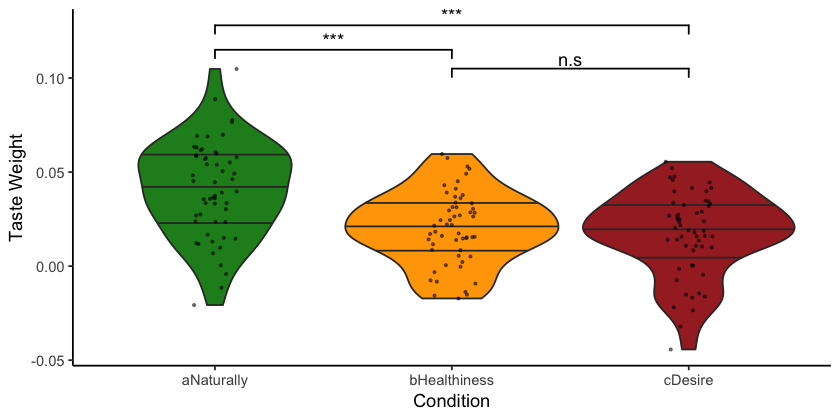

In [11]:
ddm_taste_group = ddm_taste_sub %>%
    Rmisc::summarySE(measurevar = "weight", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_taste_group


# Plot 
plot = ggplot(ddm_taste_sub, aes(cond, weight, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), size=0.5, alpha=1, show.legend = F) + #draw_quantiles = c(0.5)
    #geom_errorbar(aes(ymin = choice-se, ymax = choice+se), width=0.2, data=accept_rate_group) +
    #geom_boxplot(width = .3) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Taste Weight") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    theme_classic()

plot + 
    geom_signif(annotations = c("n.s", "***", "***"),
              y_position = c(.105, .115, .128), xmin=c(2,1,1), xmax=c(3,2,3))

In [30]:
# save image?
# ggsave("../3_4_outputs/plots/ddm_taste.pdf", width = 20, height = 15, units = "cm")

#### Statistical Significance

In [31]:
taste.aov = aov(weight ~ cond, data = ddm_taste_sub)
summaryh(taste.aov)

term,results
cond,"F(2, 162) = 17.95, p < .001, r = 0.43"


In [32]:
taste.emm = emmeans(taste.aov, list(pairwise ~ cond), adjust = "tukey")
summary(taste.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
aNaturally - bHealthiness,0.020485455,0.004273874,162,4.7931817,1.098381e-05
aNaturally - cDesire,0.023554545,0.004273874,162,5.5112868,4.119127e-07
bHealthiness - cDesire,0.003069091,0.004273874,162,0.7181051,7.531436e-01


### Health Weight

In [12]:
ddm_health_sub = df_ddm %>%
    select(Subject, Health_Nat, Health_Health, Health_Desire) %>%
    gather("Health_Nat", "Health_Health", "Health_Desire",
          key = "cond", value = "weight")

ddm_health_sub$cond = plyr::mapvalues(ddm_health_sub$cond, 
          from = c("Health_Nat", "Health_Health", "Health_Desire"),
          to = c("aNaturally", "bHealthiness", "cDesire"))

head(ddm_health_sub, 3)

Subject,cond,weight
101,aNaturally,0.0280
102,aNaturally,-0.0045
103,aNaturally,0.0266


#### Means + Plot

##### Violin

cond,N,weight,sd,se,ci
aNaturally,55,0.006698182,0.01644253,0.002217111,0.004445039
bHealthiness,55,0.036158182,0.02724204,0.003673316,0.007364555
cDesire,55,0.009869091,0.01702835,0.002296102,0.004603408


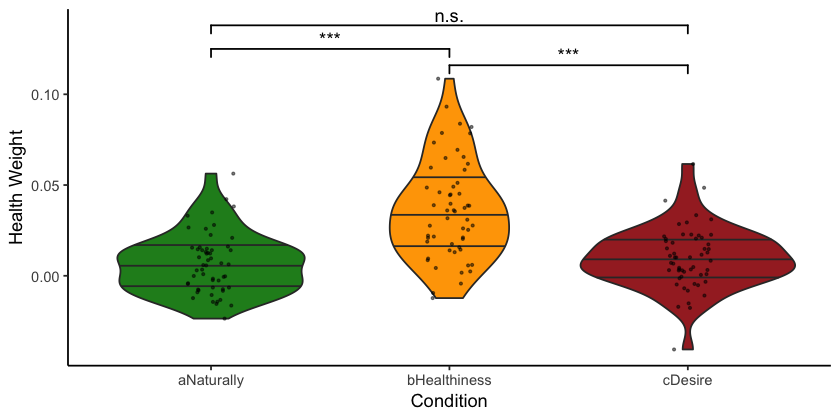

In [13]:
ddm_health_group = ddm_health_sub %>%
    Rmisc::summarySE(measurevar = "weight", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_health_group


# Plot 
plot = ggplot(ddm_health_sub, aes(cond, weight, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), size=0.5, alpha=1, show.legend = F) + #draw_quantiles = c(0.5)
    #geom_errorbar(aes(ymin = choice-se, ymax = choice+se), width=0.2, data=accept_rate_group) +
    #geom_boxplot(width = .3) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Health Weight") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    theme_classic()

plot + 
    geom_signif(annotations = c("***", "***", "n.s."),
              y_position = c(.116, .125, .138), xmin=c(2,1,1), xmax=c(3,2,3))

In [14]:
# save to file
#ggsave("../3_4_outputs/plots/ddm_health.pdf", width = 20, height = 15, units = "cm")

#### Statistical Significance

In [15]:
health.aov = aov(weight ~ cond, data = ddm_health_sub)
summaryh(health.aov)

term,results
cond,"F(2, 162) = 33.13, p < .001, r = 0.54"


In [16]:
health.emm = emmeans(health.aov, list(pairwise ~ cond), adjust = "tukey")
summary(health.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
aNaturally - bHealthiness,-0.029460000,0.003973321,162,-7.4144531,1.944489e-11
aNaturally - cDesire,-0.003170909,0.003973321,162,-0.7980501,7.047563e-01
bHealthiness - cDesire,0.026289091,0.003973321,162,6.6164030,1.533757e-09


### Boundary

In [36]:
ddm_bound_sub = df_ddm %>%
    select(Subject, Threshold_Nat, Threshold_Health, Threshold_Desire) %>%
    gather("Threshold_Nat", "Threshold_Health", "Threshold_Desire",
          key = "cond", value = "bound")

# remove outlier
ddm_bound_sub = ddm_bound_sub %>%
    filter(bound<0.3)

head(ddm_bound_sub, 3)

Subject,cond,bound
101,Threshold_Nat,0.0682
102,Threshold_Nat,0.0898
103,Threshold_Nat,0.0820


#### Means + Plot

##### Violin

cond,N,bound,sd,se,ci
Threshold_Desire,54,0.1105204,0.02591486,0.003526565,0.007073394
Threshold_Health,54,0.1061537,0.02352246,0.003201002,0.006420397
Threshold_Nat,55,0.1002473,0.02179060,0.002938244,0.005890825


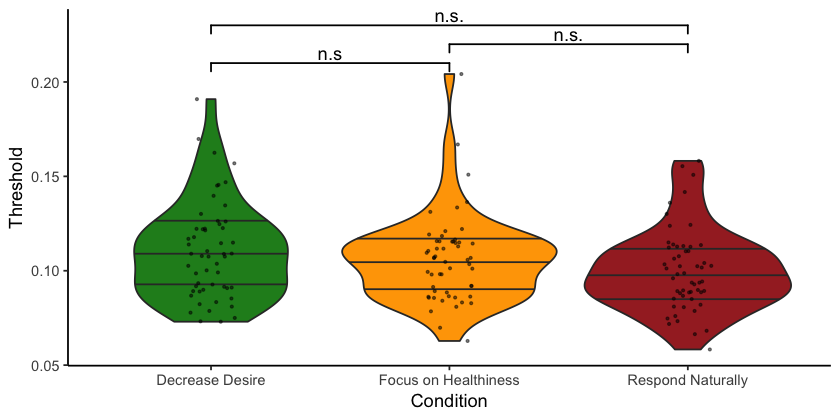

In [38]:
ddm_bound_group = ddm_bound_sub %>%
    Rmisc::summarySE(measurevar = "bound", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_bound_group


# Plot 
plot = ggplot(ddm_bound_sub, aes(cond, bound, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), size=0.5, alpha=1, show.legend = F) + #draw_quantiles = c(0.5)
    #geom_errorbar(aes(ymin = choice-se, ymax = choice+se), width=0.2, data=accept_rate_group) +
    #geom_boxplot(width = .3) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Threshold") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    scale_x_discrete(labels = c('Decrease Desire','Focus on Healthiness','Respond Naturally')) +
    theme_classic()

plot + 
    geom_signif(annotations = c("n.s", "n.s.", "n.s."),
              y_position = c(.21, .22, .23), xmin=c(1,2,1), xmax=c(2,3,3))

In [39]:
# save to file
#ggsave("../3_4_outputs/plots/ddm_bound.pdf", width = 20, height = 15, units = "cm")

#### Statistical Significance

In [288]:
bound.aov = aov(bound ~ cond, data = ddm_bound_sub)
summaryh(bound.aov)

term,results
cond,"F(2, 160) = 2.56, p = .080, r = 0.18"


In [289]:
bound.emm = emmeans(bound.aov, list(pairwise ~ cond), adjust = "tukey")
summary(bound.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
Threshold_Desire - Threshold_Health,0.004366667,0.004578528,160,0.9537272,0.60715674
Threshold_Desire - Threshold_Nat,0.010273098,0.004557669,160,2.2540246,0.06544397
Threshold_Health - Threshold_Nat,0.005906431,0.004557669,160,1.2959325,0.39954675


### SP Bias

In [40]:
ddm_sp_sub = df_ddm %>%
    select(Subject, StBias_Nat, StBias_Health, StBias_Desire) %>%
    gather("StBias_Nat", "StBias_Health", "StBias_Desire",
          key = "cond", value = "bound")

ddm_sp_sub$cond = plyr::mapvalues(ddm_sp_sub$cond, 
          from = c("StBias_Nat", "StBias_Health", "StBias_Desire"),
          to = c("aNaturally", "bHealthiness", "cDesire"))

head(ddm_sp_sub, 3)

Subject,cond,bound
101,aNaturally,-0.2868
102,aNaturally,-0.1555
103,aNaturally,-0.1555


#### Means + Plot

##### Violin

cond,N,bound,sd,se,ci
aNaturally,55,-0.1364145,0.1707911,0.02302947,0.04617131
bHealthiness,55,-0.1868200,0.1711412,0.02307667,0.04626594
cDesire,55,-0.2725055,0.1787682,0.02410509,0.04832780


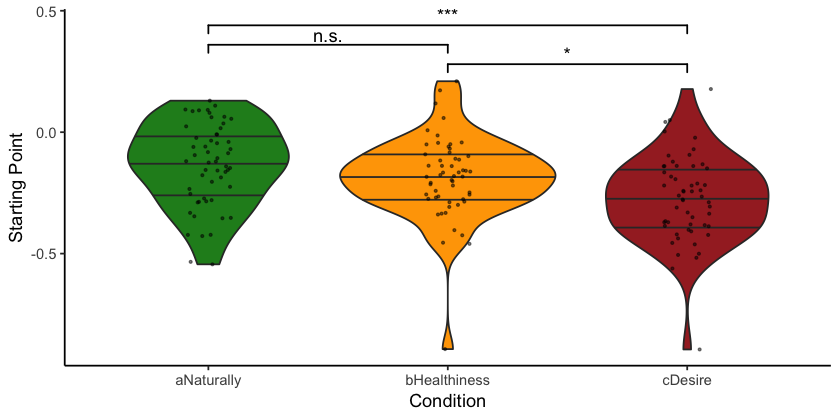

In [41]:
ddm_sp_group = ddm_sp_sub %>%
    Rmisc::summarySE(measurevar = "bound", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_sp_group


# Plot 
plot = ggplot(ddm_sp_sub, aes(cond, bound, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), size=0.5, alpha=1, show.legend = F) + #draw_quantiles = c(0.5)
    #geom_errorbar(aes(ymin = choice-se, ymax = choice+se), width=0.2, data=accept_rate_group) +
    #geom_boxplot(width = .3) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Starting Point") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    theme_classic()

plot + 
    geom_signif(annotations = c("*", "n.s.", "***"),
              y_position = c(.28, .36, .44), xmin=c(2,1,1), xmax=c(3,2,3))

In [42]:
# save to file
#ggsave("../../3_4_outputs/plots/ddm_sp.pdf", width = 20, height = 15, units = "cm")

---
#### Statistical Significance

In [33]:
sp.aov = aov(bound ~ cond, data = ddm_sp_sub)
summaryh(sp.aov)

term,results
cond,"F(2, 162) = 8.64, p < .001, r = 0.31"


In [34]:
sp.emm = emmeans(sp.aov, list(pairwise ~ cond), adjust = "tukey")
summary(sp.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
aNaturally - bHealthiness,0.05040545,0.03310533,162,1.522578,0.2830384703
aNaturally - cDesire,0.13609091,0.03310533,162,4.110845,0.0001839658
bHealthiness - cDesire,0.08568545,0.03310533,162,2.588267,0.0282315164


### NDT

In [43]:
ddm_ndt_sub = df_ddm %>%
    select(Subject, NonDec_Nat, NonDec_Health, NonDec_Desire) %>%
    gather("NonDec_Nat", "NonDec_Health", "NonDec_Desire",
          key = "cond", value = "ndt")

head(ddm_ndt_sub, 3)

Subject,cond,ndt
101,NonDec_Nat,0.5615
102,NonDec_Nat,0.3260
103,NonDec_Nat,0.3884


#### Means + Plot

##### Violin

cond,N,ndt,sd,se,ci
NonDec_Desire,55,0.5996345,0.1769717,0.02386285,0.04784214
NonDec_Health,55,0.5964927,0.1605113,0.02164334,0.04339229
NonDec_Nat,55,0.5791945,0.1457414,0.01965177,0.03939942


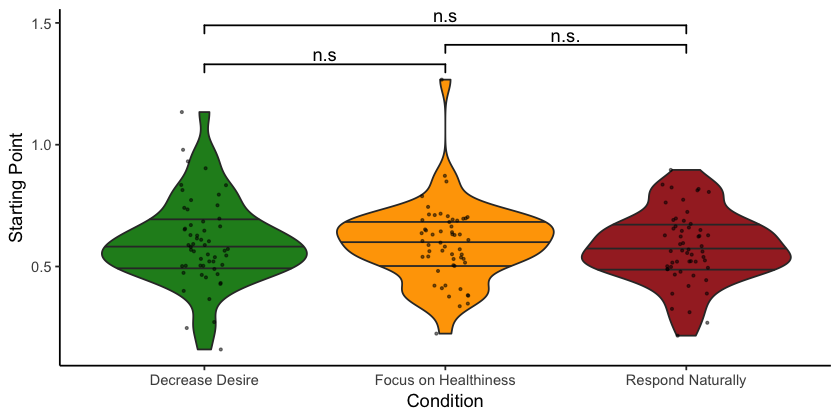

In [44]:
ddm_ndt_group = ddm_ndt_sub %>%
    Rmisc::summarySE(measurevar = "ndt", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_ndt_group


# Plot 
plot = ggplot(ddm_ndt_sub, aes(cond, ndt, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), size=0.5, alpha=1, show.legend = F) + #draw_quantiles = c(0.5)
    #geom_errorbar(aes(ymin = choice-se, ymax = choice+se), width=0.2, data=accept_rate_group) +
    #geom_boxplot(width = .3) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Starting Point") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    scale_x_discrete(labels = c('Decrease Desire','Focus on Healthiness','Respond Naturally')) +
    theme_classic()

plot + 
    geom_signif(annotations = c("n.s", "n.s.", "n.s"),
              y_position = c(1.33, 1.41, 1.49), xmin=c(1,2,1), xmax=c(2,3,3))

In [45]:
# save to file
#ggsave("../3_4_outputs/plots/ddm_ndt.pdf", width = 20, height = 15, units = "cm")

---
#### Statistical Significance

In [303]:
ndt.aov = aov(ndt ~ cond, data = ddm_ndt_sub)
summaryh(ndt.aov)

term,results
cond,"F(2, 162) = 0.26, p = .775, r = 0.06"


In [304]:
ndt.emm = emmeans(ndt.aov, list(pairwise ~ cond), adjust = "tukey")
summary(ndt.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
NonDec_Desire - NonDec_Health,0.003141818,0.03081192,162,0.1019676,0.9942843
NonDec_Desire - NonDec_Nat,0.020440000,0.03081192,162,0.6633795,0.7850278
NonDec_Health - NonDec_Nat,0.017298182,0.03081192,162,0.5614119,0.8407446


## +Constant Version

In [17]:
# load data
df_ddm_constant = read_csv("ddm/DDMAnalysis_ConstantModel/params_GoodSubjects.csv")

Parsed with column specification:
cols(
  Subject = col_double(),
  wTaste_nat = col_double(),
  wHealth_nat = col_double(),
  Threshold_nat = col_double(),
  Bias_nat = col_double(),
  ndt_nat = col_double(),
  wConstant_nat = col_double(),
  wTaste_health = col_double(),
  wHealth_health = col_double(),
  Threshold_health = col_double(),
  Bias_health = col_double(),
  ndt_health = col_double(),
  wConstant_health = col_double(),
  wTaste_desire = col_double(),
  wHealth_desire = col_double(),
  Threshold_desire = col_double(),
  Bias_desire = col_double(),
  ndt_desire = col_double(),
  wConstant_desire = col_double()
)


In [18]:
dim(df_ddm_constant)[1]

[1] 50

In [19]:
# Remove rejected subjects 

good_subjects = c(101:104, 106:112, 114, 116, 118:121, 123:126, 129:137, 139:140, 142:148, 150, 152:158, 162:164)
# remove "bad" subjects
df_ddm_constant = df_ddm_constant %>%
    filter(Subject %in% good_subjects)

In [20]:
dim(df_ddm_constant)[1]

[1] 50

In [21]:
head(df_ddm_constant, 3)

Subject,wTaste_nat,wHealth_nat,Threshold_nat,Bias_nat,ndt_nat,wConstant_nat,wTaste_health,wHealth_health,Threshold_health,Bias_health,ndt_health,wConstant_health,wTaste_desire,wHealth_desire,Threshold_desire,Bias_desire,ndt_desire,wConstant_desire
101,0.0869,0.0355,0.0701,-0.1100,0.5504,-0.0917,0.0429,0.0910,0.0664,0.0137,0.5524,-0.1360,0.0532,0.0307,0.0774,-0.0090,0.4382,-0.1405
102,0.0267,0.0015,0.1041,0.1671,0.2568,-0.1445,0.0120,0.0487,0.1184,-0.0066,0.3362,-0.0855,0.0272,-0.0163,0.1154,-0.0268,0.3429,-0.0841
103,0.0085,0.0312,0.0824,-0.1353,0.3873,-0.0159,0.0335,0.0323,0.0874,-0.1085,0.3748,-0.0463,0.0559,0.0169,0.0785,-0.1448,0.4372,-0.0689


### Taste Weight

In [26]:
ddm_taste_sub = df_ddm_constant %>%
    select(Subject, wTaste_nat, wTaste_health, wTaste_desire) %>%
    gather("wTaste_nat", "wTaste_health", "wTaste_desire",
          key = "cond", value = "weight")

head(ddm_taste_sub, 3)


Subject,cond,weight
101,wTaste_nat,0.0869
102,wTaste_nat,0.0267
103,wTaste_nat,0.0085


In [28]:
ddm_taste_sub$cond = plyr::mapvalues(ddm_taste_sub$cond, 
          from = c("wTaste_nat", "wTaste_health", "wTaste_desire"),
          to = c("aNaturally", "bHealthiness", "cDesire"))


#### Means + Plot

##### Violin

cond,N,weight,sd,se,ci
aNaturally,50,0.023688,0.02156210,0.003049342,0.006127882
bHealthiness,50,0.014352,0.01860936,0.002631761,0.005288721
cDesire,50,0.020056,0.01766894,0.002498766,0.005021458


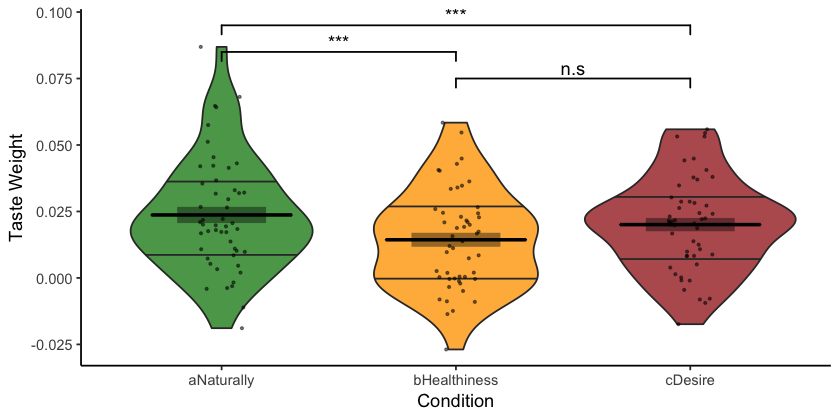

In [29]:
ddm_taste_group = ddm_taste_sub %>%
    Rmisc::summarySE(measurevar = "weight", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_taste_group


# Plot 
plot = ggplot(ddm_taste_sub, aes(cond, weight, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.75), size=0.5, alpha=0.8, show.legend = F) +
    geom_linerange(aes(ymin = weight-se, ymax = weight+se), size=25, alpha=0.4, data=ddm_taste_group) +
    geom_crossbar(stat="summary", fun.y=mean, fun.ymax=mean, fun.ymin=mean, fatten=2, width=0.6, show.legend = F) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Taste Weight") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    theme_classic()

plot + 
    geom_signif(annotations = c("n.s", "***", "***"),
              y_position = c(.075, .085, .095), xmin=c(2,1,1), xmax=c(3,2,3))

In [56]:
# save to file
#ggsave("../3_4_outputs/plots/ddm_taste.pdf", width = 20, height = 15, units = "cm")

---
#### Statistical Significance

In [86]:
taste.aov = aov(weight ~ cond, data = ddm_taste_sub)
summaryh(taste.aov)

term,results
cond,"F(2, 132) = 15.59, p < .001, r = 0.44"


In [87]:
taste.emm = emmeans(taste.aov, list(pairwise ~ cond), adjust = "tukey")
summary(taste.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
aNaturally - bHealthiness,0.021064444,0.004692442,132,4.4890155,4.569415e-05
aNaturally - cDesire,0.024028889,0.004692442,132,5.1207642,3.139514e-06
bHealthiness - cDesire,0.002964444,0.004692442,132,0.6317488,8.029308e-01


### Health Weight

In [57]:
ddm_health_sub = df_ddm_constant %>%
    select(Subject, Health_Nat, Health_Health, Health_Desire) %>%
    gather("Health_Nat", "Health_Health", "Health_Desire",
          key = "cond", value = "weight")

ddm_health_sub$cond = plyr::mapvalues(ddm_health_sub$cond, 
          from = c("Health_Nat", "Health_Health", "Health_Desire"),
          to = c("aNaturally", "bHealthiness", "cDesire"))

head(ddm_health_sub, 3)


Subject,cond,weight
101,aNaturally,0.0280
102,aNaturally,-0.0045
103,aNaturally,0.0266


#### Means + Plot

##### Violin

cond,N,weight,sd,se,ci
aNaturally,45,0.008453333,0.01670866,0.00249078,0.005019838
bHealthiness,45,0.038615556,0.02605728,0.00388439,0.007828473
cDesire,45,0.010088889,0.01785154,0.00266115,0.005363195


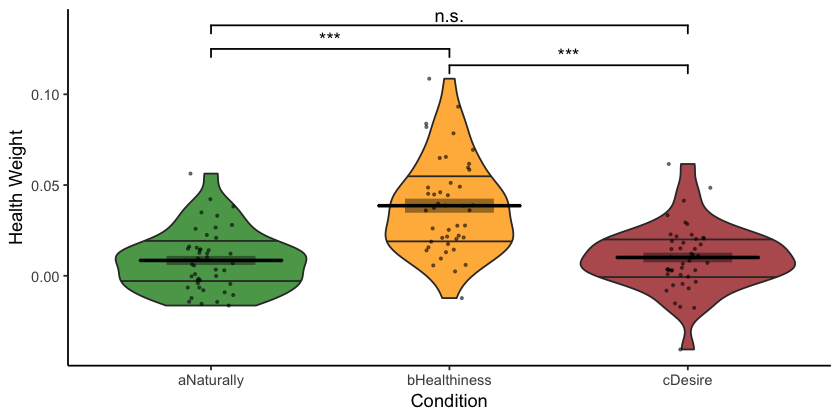

In [58]:
ddm_health_group = ddm_health_sub %>%
    Rmisc::summarySE(measurevar = "weight", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_health_group


# Plot 
plot = ggplot(ddm_health_sub, aes(cond, weight, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.75), size=0.5, alpha=0.8, show.legend = F) +
    geom_linerange(aes(ymin = weight-se, ymax = weight+se), size=25, alpha=0.4, data=ddm_health_group) +
    geom_crossbar(stat="summary", fun.y=mean, fun.ymax=mean, fun.ymin=mean, fatten=2, width=0.6, show.legend = F) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Health Weight") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    theme_classic()

plot + 
    geom_signif(annotations = c("***", "***", "n.s."),
              y_position = c(.116, .125, .138), xmin=c(2,1,1), xmax=c(3,2,3))

In [59]:
# save to file
#ggsave("../3_4_outputs/plots/ddm_health.pdf", width = 20, height = 15, units = "cm")

---
#### Statistical Significance

In [93]:
health.aov = aov(weight ~ cond, data = ddm_health_sub)
summaryh(health.aov)

term,results
cond,"F(2, 132) = 30.42, p < .001, r = 0.56"


In [94]:
health.emm = emmeans(health.aov, list(pairwise ~ cond), adjust = "tukey")
summary(health.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
aNaturally - bHealthiness,-0.030162222,0.004349267,132,-6.9350122,4.906379e-10
aNaturally - cDesire,-0.001635556,0.004349267,132,-0.3760531,9.250596e-01
bHealthiness - cDesire,0.028526667,0.004349267,132,6.5589591,3.364276e-09


### Boundary

In [62]:
ddm_bound_sub = df_ddm_constant %>%
    select(Subject, Threshold_Nat, Threshold_Health, Threshold_Desire) %>%
    gather("Threshold_Nat", "Threshold_Health", "Threshold_Desire",
          key = "cond", value = "bound")

# remove outlier
ddm_bound_sub = ddm_bound_sub %>%
    filter(bound<0.3)

head(ddm_bound_sub, 3)


Subject,cond,bound
101,Threshold_Nat,0.0682
102,Threshold_Nat,0.0898
103,Threshold_Nat,0.0820


#### Means + Plot

##### Violin

cond,N,bound,sd,se,ci
Threshold_Desire,45,0.1107200,0.02700736,0.004026020,0.008113909
Threshold_Health,45,0.1068978,0.02534881,0.003778777,0.007615625
Threshold_Nat,45,0.0990000,0.02151809,0.003207727,0.006464750


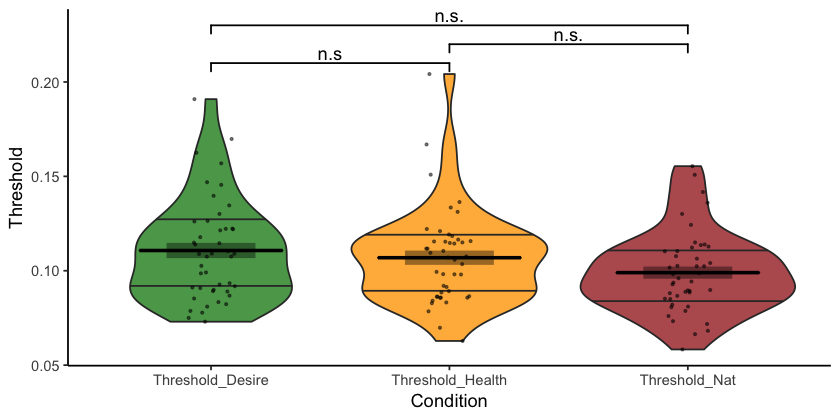

In [65]:
ddm_bound_group = ddm_bound_sub %>%
    Rmisc::summarySE(measurevar = "bound", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_bound_group


# Plot 
plot = ggplot(ddm_bound_sub, aes(cond, bound, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.75), size=0.5, alpha=0.8, show.legend = F) +
    geom_linerange(aes(ymin = bound-se, ymax = bound+se), size=25, alpha=0.4, data=ddm_bound_group) +
    geom_crossbar(stat="summary", fun.y=mean, fun.ymax=mean, fun.ymin=mean, fatten=2, width=0.6, show.legend = F) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Threshold") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    theme_classic()

plot + 
    geom_signif(annotations = c("n.s", "n.s.", "n.s."),
              y_position = c(.21, .22, .23), xmin=c(1,2,1), xmax=c(2,3,3))

In [64]:
# save to file
#ggsave("../3_4_outputs/plots/ddm_bound.pdf", width = 20, height = 15, units = "cm")

---
#### Statistical Significance

In [97]:
bound.aov = aov(bound ~ cond, data = ddm_bound_sub)
summaryh(bound.aov)

term,results
cond,"F(2, 132) = 2.63, p = .076, r = 0.20"


In [98]:
bound.emm = emmeans(bound.aov, list(pairwise ~ cond), adjust = "tukey")
summary(bound.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
Threshold_Desire - Threshold_Health,0.003822222,0.005213924,132,0.7330798,0.7443171
Threshold_Desire - Threshold_Nat,0.011720000,0.005213924,132,2.2478271,0.0670387
Threshold_Health - Threshold_Nat,0.007897778,0.005213924,132,1.5147474,0.2873050


### SP Bias

In [71]:
ddm_sp_sub = df_ddm_constant %>%
    select(Subject, StBias_Nat, StBias_Health, StBias_Desire) %>%
    gather("StBias_Nat", "StBias_Health", "StBias_Desire",
          key = "cond", value = "bias")

ddm_sp_sub$cond = plyr::mapvalues(ddm_sp_sub$cond, 
          from = c("StBias_Nat", "StBias_Health", "StBias_Desire"),
          to = c("aNaturally", "bHealthiness", "cDesire"))

head(ddm_sp_sub, 3)

Subject,cond,bias
101,aNaturally,-0.2868
102,aNaturally,-0.1555
103,aNaturally,-0.1555


#### Means + Plot

##### Violin

cond,N,bias,sd,se,ci
aNaturally,45,-0.1461022,0.1609973,0.02400006,0.04836894
bHealthiness,45,-0.1715578,0.1456364,0.02171019,0.04375401
cDesire,45,-0.2646756,0.1598797,0.02383347,0.04803319


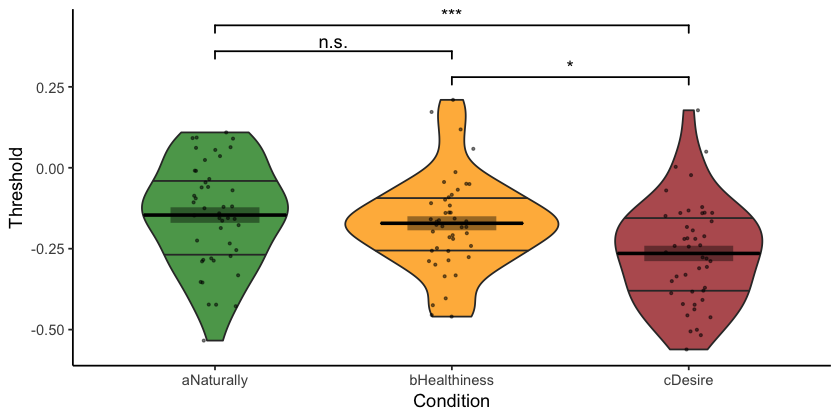

In [73]:
ddm_sp_group = ddm_sp_sub %>%
    Rmisc::summarySE(measurevar = "bias", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_sp_group

# Plot 
plot = ggplot(ddm_sp_sub, aes(cond, bias, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.75), size=0.5, alpha=0.8, show.legend = F) +
    geom_linerange(aes(ymin = bias-se, ymax = bias+se), size=25, alpha=0.4, data=ddm_sp_group) +
    geom_crossbar(stat="summary", fun.y=mean, fun.ymax=mean, fun.ymin=mean, fatten=2, width=0.6, show.legend = F) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Threshold") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    theme_classic()

plot + 
    geom_signif(annotations = c("*", "n.s.", "***"),
              y_position = c(.28, .36, .44), xmin=c(2,1,1), xmax=c(3,2,3))

In [68]:
# save to file
#ggsave("../3_4_outputs/plots/ddm_sp.pdf", width = 20, height = 15, units = "cm")

---
#### Statistical Significance

In [104]:
sp.aov = aov(bound ~ cond, data = ddm_sp_sub)
summaryh(sp.aov)

term,results
cond,"F(2, 132) = 7.24, p = .001, r = 0.31"


In [105]:
sp.emm = emmeans(sp.aov, list(pairwise ~ cond), adjust = "tukey")
summary(sp.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
aNaturally - bHealthiness,0.02545556,0.03281635,132,0.7756973,0.718574096
aNaturally - cDesire,0.11857333,0.03281635,132,3.6132395,0.001239592
bHealthiness - cDesire,0.09311778,0.03281635,132,2.8375421,0.014472304


---
### NDT

In [74]:
ddm_ndt_sub = df_ddm %>%
    select(Subject, NonDec_Nat, NonDec_Health, NonDec_Desire) %>%
    gather("NonDec_Nat", "NonDec_Health", "NonDec_Desire",
          key = "cond", value = "ndt")

head(ddm_ndt_sub, 3)

Subject,cond,ndt
101,NonDec_Nat,0.5615
102,NonDec_Nat,0.3260
103,NonDec_Nat,0.3884


#### Means + Plot

##### Violin

cond,N,ndt,sd,se,ci
NonDec_Desire,55,0.5996345,0.1769717,0.02386285,0.04784214
NonDec_Health,55,0.5964927,0.1605113,0.02164334,0.04339229
NonDec_Nat,55,0.5791945,0.1457414,0.01965177,0.03939942


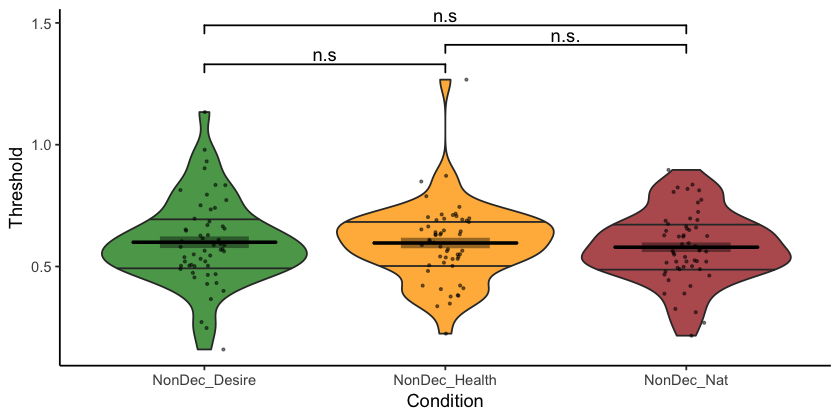

In [77]:
ddm_ndt_group = ddm_ndt_sub %>%
    Rmisc::summarySE(measurevar = "ndt", groupvars = c("cond"))

#pander(ddm_taste_group)
ddm_ndt_group


# Plot 
plot = ggplot(ddm_ndt_sub, aes(cond, ndt, fill = cond)) +
    geom_violin(draw_quantiles = c(0.25, 0.75), size=0.5, alpha=0.8, show.legend = F) +
    geom_linerange(aes(ymin = ndt-se, ymax = ndt+se), size=25, alpha=0.4, data=ddm_ndt_group) +
    geom_crossbar(stat="summary", fun.y=mean, fun.ymax=mean, fun.ymin=mean, fatten=2, width=0.6, show.legend = F) +
    geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
    xlab("Condition") +
    ylab("Threshold") +
    scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
    theme_classic()

plot + 
    geom_signif(annotations = c("n.s", "n.s.", "n.s"),
              y_position = c(1.33, 1.41, 1.49), xmin=c(1,2,1), xmax=c(2,3,3))

In [ ]:
# save to file
#ggsave("../3_4_outputs/plots/ddm_ndt.pdf", width = 20, height = 15, units = "cm")

#### Statistical Significance

In [303]:
ndt.aov = aov(ndt ~ cond, data = ddm_ndt_sub)
summaryh(ndt.aov)

term,results
cond,"F(2, 162) = 0.26, p = .775, r = 0.06"


In [304]:
ndt.emm = emmeans(ndt.aov, list(pairwise ~ cond), adjust = "tukey")
summary(ndt.emm$`pairwise differences of cond`)

contrast,estimate,SE,df,t.ratio,p.value
NonDec_Desire - NonDec_Health,0.003141818,0.03081192,162,0.1019676,0.9942843
NonDec_Desire - NonDec_Nat,0.020440000,0.03081192,162,0.6633795,0.7850278
NonDec_Health - NonDec_Nat,0.017298182,0.03081192,162,0.5614119,0.8407446


---
### SMP Outputs
---

* For `corelSPM` MatLab file
* Needs to be row vector

In [31]:
names(df_ddm_constant)

[1] "Subject"          "wTaste_nat"       "wHealth_nat"      "Threshold_nat"   
 [5] "Bias_nat"         "ndt_nat"          "wConstant_nat"    "wTaste_health"   
 [9] "wHealth_health"   "Threshold_health" "Bias_health"      "ndt_health"      
[13] "wConstant_health" "wTaste_desire"    "wHealth_desire"   "Threshold_desire"
[17] "Bias_desire"      "ndt_desire"       "wConstant_desire"

In [30]:
max(df_ddm_constant$Subject)

[1] 164

In [40]:
# Health Weight Change, HvN
output_vec = df_ddm_constant %>%
    mutate(vec = wHealth_health - wHealth_nat) %>%
    select(vec) %>%
    data.matrix() %>%
    t()

In [41]:
# make string
vector_name = "wHealth_change_HvN"

In [42]:
save_location = "/Volumes/DJW_Lacie_01/PROJECTS/2018_Food_Reg_fMRI/09_DATA/food_reg_fmri_01/analysis/SPM/correlation_regressors/"

In [44]:
library(R.matlab)
# save as matlab file
writeMat(con=paste0(save_location, vector_name, ".mat"), 
                    xvar_values=as.matrix(output_vec))

In [154]:
# test to see if the single vector I have created "works"
# figure out workflow for vector creation (or leave to Abhay)
# look into clustering techniques

---
# Functions
---

## Plotting

In [17]:
my_v_plot = function(df, measurevar, xlab, ylab){
    group = df %>%
        se(measurevar = "bound", groupvars = c("cond"))

    print(ddm_bound_group)
    
    plot = ggplot(ddm_bound_sub, aes(cond, bound, fill = cond)) +
        geom_violin(draw_quantiles = c(0.25, 0.75), size=0.5, alpha=0.8, show.legend = F) +
        geom_linerange(aes(ymin = weight-se, ymax = weight+se), size=25, alpha=0.4, data=ddm_bound_group) +
        geom_crossbar(stat="summary", fun.y=mean, fun.ymax=mean, fun.ymin=mean, fatten=2, width=0.6, show.legend = F) +
        geom_jitter(height = 0, width = 0.1, size = 0.5, alpha=0.5, show.legend = F) +
        xlab("Condition") +
        ylab("Threshold") +
        scale_fill_manual(values = c("forestgreen", "orange", "brown")) +
        theme_classic()
        return(plot)
}